In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.interpolate import UnivariateSpline
from matplotlib import cm
from matplotlib import colors

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 加载数据
data = pd.read_excel('数据收集2.xlsx', index_col='id')
years = np.array(data.index)
x = np.arange(len(years))

filled_data = data.copy()

# 平滑样条插值填补缺失值
for col in data.columns:
    y = data[col].values
    not_nan = ~pd.isna(y)
    
    if not_nan.sum() >= 3:  
        spline = UnivariateSpline(x[not_nan], y[not_nan], s=0.5)
        filled_data[col] = spline(x)
    else:
        filled_data[col] = data[col].fillna(method='ffill') 

C:\Users\Hwh\AppData\Local\Temp\ipykernel_7016\1624991309.py:26: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  spline = UnivariateSpline(x[not_nan], y[not_nan], s=0.5)


In [ ]:
# 创建图表
fig = plt.figure(figsize=(20, 28), facecolor='white')
fig.suptitle('24个经济环境指标插值填补前后对比 (2014-2024)', 
             fontsize=24, fontweight='bold', y=0.98)

# 创建6×4的网格布局 - 用于24个子图
gs = gridspec.GridSpec(6, 4, figure=fig, hspace=0.45, wspace=0.3)

# 创建颜色映射（24种颜色）
colormap = cm.get_cmap('tab20', 24)
normalize = colors.Normalize(vmin=0, vmax=23)
color_list = [colormap(normalize(i)) for i in range(24)]

# 绘制所有24个子图
for i, col in enumerate(data.columns):
    ax = fig.add_subplot(gs[i // 4, i % 4])  # 6行4列布局
    
    # 获取原始和填补后数据
    orig = data[col].values
    filled = filled_data[col].values
    
    # 绘制原始数据（虚线+点）
    ax.plot(x, orig, 'o--', 
            color=color_list[i], 
            alpha=0.7,
            linewidth=1.8,
            markersize=5,
            label='原始数据')
    
    # 绘制填补后数据（实线）
    ax.plot(x, filled, '-',
            color=color_list[i],
            linewidth=3,
            alpha=1.0,
            label='填补后数据')
    
    
    # 标记填补点
    nan_idx = np.where(pd.isna(orig))[0]
    if len(nan_idx) > 0:
        ax.scatter(x[nan_idx], filled[nan_idx], 
                   color='red',
                   s=80,
                   marker='X',
                   zorder=10,
                   edgecolor='black',
                   linewidth=0.8,
                   label='填补点')
    
    # 设置子图属性
    ax.set_title(col, fontsize=14, pad=10, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(years, rotation=45, fontsize=10)
    ax.grid(True, alpha=0.2, linestyle='--', color='gray')
    
    # 设置图表边框
    for spine in ax.spines.values():
        spine.set_color('#aaaaaa')
    
    # 设置y轴标签
    if i % 4 == 0:  # 每行第一个图
        ax.set_ylabel('指标值', fontsize=12)
    
    # 设置x轴标签
    if i >= 20:  # 最后一行
        ax.set_xlabel('年份', fontsize=12)

# 添加共享图例
legend_elements = [
    plt.Line2D([0], [0], color='gray', lw=3, linestyle='--', marker='o', markersize=8),
    plt.Line2D([0], [0], color='gray', lw=3),
    plt.scatter([], [], color='red', s=80, marker='X', edgecolors='black')
]

fig.legend(legend_elements, 
           ['原始数据 (带缺失)', '填补后数据 (平滑曲线)', '填补点'], 
           loc='upper center', 
           bbox_to_anchor=(0.5, 0.03), 
           ncol=3, 
           fontsize=14,
           frameon=True,
           fancybox=True,
           shadow=True)

# 添加统一坐标标签
fig.text(0.5, 0.94, '', ha='center', fontsize=12)
fig.text(0.08, 0.5, '指标数值', va='center', rotation='vertical', fontsize=16)
fig.text(0.5, 0.01, '年份', ha='center', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])  # 为图例留出空间
plt.savefig('经济环境指标插值填补对比.png', dpi=10, bbox_inches='tight')
plt.show()

In [21]:
data.head(15)

,GDP总量(万亿元),人均GDP（万元）,第三产业占比（%）,规模以上工业总资产增加值（亿元）,工业能源消耗（万吨标准煤）,工业产值增加量（亿元）,单位工业产值能耗（吨标准煤/万元）,焦炭产量(万吨),农业总产值（亿元）,耕地面积（千公顷）,...,居民人均可支配收入（元）,居民生活用电量（亿千瓦时）,民用汽车保有量（万辆）,电力蒸汽热水供应碳排放（mt）,造林总面积(千公顷),人均公园绿地面积(平方米/人),建成区绿地覆盖率,能源消费总量（万吨标准煤）,表观总碳排放(mt),单位GDP碳排放强度(吨/万元)
id,,,,,,,,,,,,,,,,,,,,,
2014,1.21708,3.3464,37.856180,779.42,NaN,4527.9,1.164337,802.80,3193.58,5305.20,...,17404.0,163.90,322.78,127.964043,101.08,12.10,36.0,11954.9,350.35,2.878611
2015,1.16900,3.2759,43.207015,412.77,6527.260184,3593.9,1.816205,687.46,3156.93,5530.84,...,18593.0,167.60,351.75,126.437421,134.97,11.98,35.8,12126.2,347.80,2.975192
2016,1.18950,3.4025,45.851198,-456.04,6612.857208,3367.3,1.963846,674.52,3189.71,5932.74,...,19838.0,172.70,394.19,133.973699,93.00,11.91,35.4,12280.5,365.37,3.071627
2017,1.23130,3.5887,47.333712,-411.21,6626.052744,3226.1,2.053889,761.25,3471.26,6030.97,...,21206.0,181.40,435.32,148.452529,97.59,11.78,35.5,12535.6,NaN,NaN
2018,1.28465,3.8199,49.112988,440.89,5948.500000,3266.7,1.820951,875.80,3634.99,6119.57,...,22726.0,184.64,477.41,150.461142,96.64,12.35,36.0,11435.9,338.79,2.637216
2019,1.35444,4.1156,49.622722,1415.24,6282.700000,3334.0,1.884433,1075.89,3774.48,6177.59,...,24254.0,182.28,516.11,165.031327,118.26,12.43,36.4,11613.9,341.14,2.518679
2020,1.36334,4.2432,49.426409,841.44,6320.400000,3121.8,2.024601,1062.66,4044.15,6171.61,...,24902.0,195.23,555.33,169.637318,121.28,12.77,36.9,11525.1,336.89,2.471064
2021,1.48582,4.7199,49.186981,1411.90,6754.800000,3751.0,1.800800,1234.92,4099.55,6220.51,...,27159.0,198.76,592.32,180.036423,95.69,13.60,37.4,12191.6,358.51,2.412876
2022,1.58315,5.0873,48.128099,1529.13,6455.300000,4198.3,1.537599,1112.32,4320.48,6152.89,...,28346.0,207.08,627.61,NaN,75.47,14.04,38.0,12035.0,NaN,NaN


In [ ]:
"""
数据预处理
1.考虑数据来源的权威性，认为数据均是可信的。无需异常值清洗。
2.对于数据的缺失值，考虑到数据的现实意义，认为数据与政策等存在关系，考虑以时间（年份）为横坐标进行高次多项式插值处理
"""

In [19]:
filled_data.head(15)

,GDP总量(万亿元),人均GDP（万元）,第三产业占比（%）,规模以上工业总资产增加值（亿元）,工业能源消耗（万吨标准煤）,工业产值增加量（亿元）,单位工业产值能耗（吨标准煤/万元）,焦炭产量(万吨),农业总产值（亿元）,耕地面积（千公顷）,...,居民人均可支配收入（元）,居民生活用电量（亿千瓦时）,民用汽车保有量（万辆）,电力蒸汽热水供应碳排放（mt）,造林总面积(千公顷),人均公园绿地面积(平方米/人),建成区绿地覆盖率,能源消费总量（万吨标准煤）,表观总碳排放(mt),单位GDP碳排放强度(吨/万元)
id,,,,,,,,,,,,,,,,,,,,,
2014,1.209551,3.359221,37.887721,779.426496,7872.664504,4527.893630,1.255388,802.803969,3193.595930,5305.161968,...,17404.001640,163.903884,322.756128,127.979582,101.112737,12.129916,35.961399,11954.912188,350.309540,2.871216
2015,1.184558,3.294131,43.109584,412.736559,6527.241881,3593.926121,1.675200,687.435082,3156.852646,5531.021779,...,18592.988399,167.585928,351.864756,126.345585,134.806441,11.926816,35.714079,12126.128394,347.972374,3.020181
2016,1.191015,3.367606,45.894418,-455.953808,6612.957440,3367.271964,1.922053,674.596668,3189.855167,5932.387237,...,19838.043979,172.699388,393.953039,134.218175,93.351326,11.870312,35.608834,12280.690280,365.129206,3.001720
2017,1.222846,3.548271,47.497952,-411.381044,6625.809174,3226.047562,2.029225,761.088368,3471.159392,6031.310078,...,21205.880305,181.497362,435.616825,148.059839,97.154539,11.950685,35.653124,12535.288931,355.000197,2.874038
2018,1.273973,3.804752,48.866837,441.184025,5948.859958,3266.927069,2.029993,876.066973,3634.894405,6119.459274,...,22726.246867,184.371187,477.087637,150.879982,96.991361,12.158214,35.854406,11436.265530,339.166580,2.695343
2019,1.338319,4.105676,49.711427,1414.841594,6282.316601,3333.600117,1.957633,1075.533207,3774.810754,6177.429422,...,24253.620757,182.688023,516.475758,164.737401,118.077157,12.483179,36.220140,11613.554406,340.682263,2.523839
2020,1.409809,4.419668,49.588944,841.824590,6320.722261,3122.231140,1.845423,1063.038257,4043.707933,6171.919802,...,24902.414879,194.822023,555.026606,169.759272,121.320016,12.915860,36.757786,11525.374816,337.128685,2.417734
2021,1.482364,4.715354,48.803343,1411.654553,6754.595192,3750.708432,1.726640,1234.615944,4099.900668,6220.237523,...,27158.699827,199.030557,592.429273,180.014066,95.708618,13.446536,37.474802,12191.430179,358.461353,2.435233
2022,1.549908,4.961362,48.537979,1529.222614,6455.382859,4198.413140,1.634561,1112.491955,4320.322766,6153.018421,...,28346.126718,206.972531,627.624989,222.485741,75.454616,14.065487,38.378648,12035.067532,451.633686,2.634542


In [ ]:
"""
数据归一化
"""

In [23]:
filled_data.to_csv('filled_data.csv', 
                  index=True,          # 保留年份索引
                  float_format="%.4f", # 保留4位小数
                  encoding='utf_8_sig')

<>:403: SyntaxWarning: invalid escape sequence '\e'
<>:403: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Hwh\AppData\Local\Temp\ipykernel_7016\412343508.py:403: SyntaxWarning: invalid escape sequence '\e'
  """# 添加效率公式
C:\Users\Hwh\AppData\Local\Temp\ipykernel_7016\412343508.py:436: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


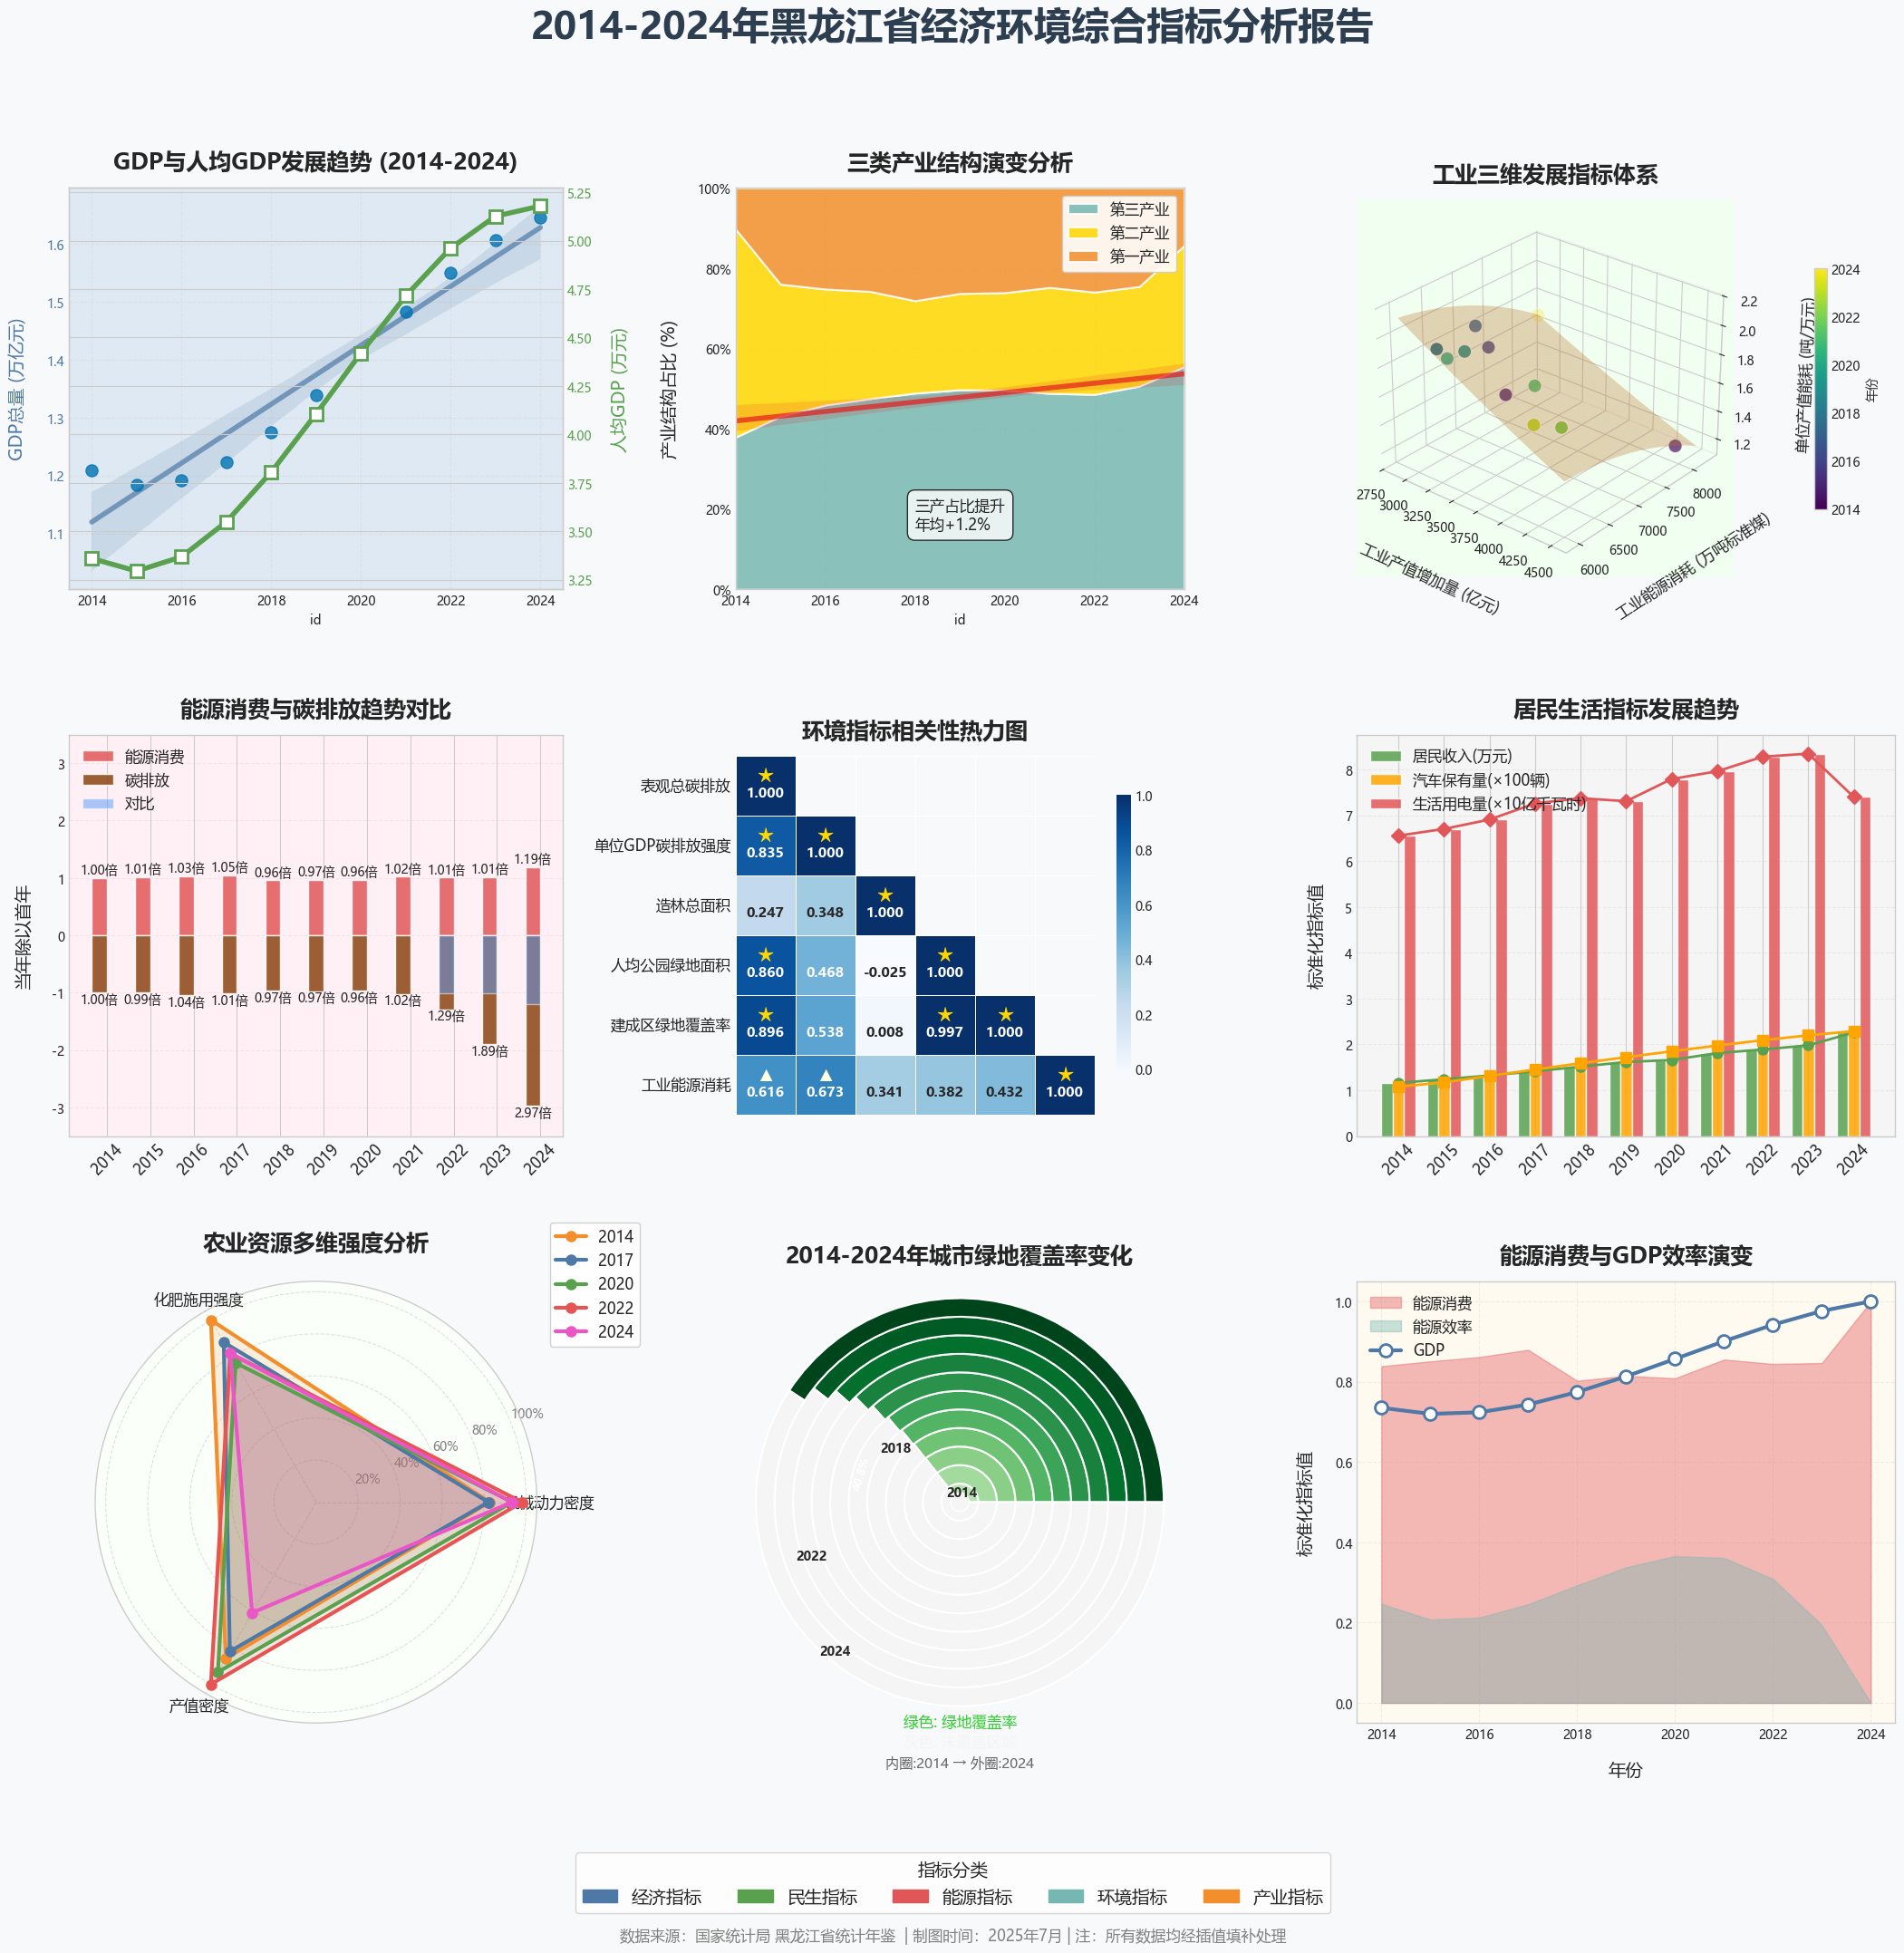

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib import cm
import matplotlib as mpl
import matplotlib.patches as mpatches

# ===== 专业级全局样式设置 =====
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'Microsoft YaHei'  
mpl.rcParams['axes.unicode_minus'] = False
sns.set_palette('colorblind')

palette = {
    '经济': '#4E79A7',    # GDP主色
    '民生': '#59A14F',    # 居民生活色
    '能源': '#E15759',    # 能源消耗色
    '环境': '#76B7B2',    # 环境指标色
    '产业': '#F28E2B',    # 产业结构色
    '辅助': '#B07AA1'     # 辅助色
}

fig = plt.figure(figsize=(26, 22), facecolor='#f8f9fa')
fig.suptitle('2014-2024年黑龙江省经济环境综合指标分析报告', 
             fontsize=30, fontweight='bold', y=0.97, color='#2c3e50')
gs = gridspec.GridSpec(3, 3, figure=fig, 
                      width_ratios=[1.1, 1, 1.2], 
                      height_ratios=[1, 1, 1.1],
                      hspace=0.35, wspace=0.35)


#1. GDP与人均GDP发展趋势
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_facecolor("#dfe9f3")  
# GDP趋势线
sns.regplot(x=filled_data.index.astype(int), y=filled_data['GDP总量(万亿元)'], 
            ax=ax1, ci=95, scatter_kws={'s': 90, 'zorder': 3},
            line_kws={'lw': 4, 'color': palette['经济'], 'alpha': 0.7})
# 人均GDP
ax1b = ax1.twinx()
ax1b.plot(filled_data.index, filled_data['人均GDP（万元）'], 
          's-', linewidth=4, markersize=10, color=palette['民生'], 
          markerfacecolor='white', markeredgewidth=2, label='人均GDP')
# 轴
ax1.set_title('GDP与人均GDP发展趋势 (2014-2024)', fontsize=18, pad=15, fontweight='bold')
ax1.set_ylabel('GDP总量 (万亿元)', color=palette['经济'], fontsize=14, labelpad=15)
ax1b.set_ylabel('人均GDP (万元)', color=palette['民生'], fontsize=14, labelpad=15)
ax1.tick_params(axis='y', colors=palette['经济'])
ax1b.tick_params(axis='y', colors=palette['民生'])
ax1.grid(True, alpha=0.3, linestyle='--')




#2. 经济结构
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_facecolor('#fffaf0')  # 淡橙色背景

#产业数据
industry = 100*filled_data['工业能源消耗（万吨标准煤）']/filled_data['单位工业产值能耗（吨标准煤/万元）']/10000/filled_data['GDP总量(万亿元)']
agriculture = 100 - filled_data['第三产业占比（%）'] - industry
services = filled_data['第三产业占比（%）']

# 百分比堆积图
ax2.stackplot(filled_data.index, services, industry, agriculture,  
              labels=['第三产业','第二产业', '第一产业'],
              colors= [palette['环境'],'#FFD700',palette['产业']], 
              alpha=0.85, edgecolor='white', linewidth=1.5)
qwq=sns.regplot(x=filled_data.index.astype(int), y=services, 
            ax=ax2, ci=95, scatter_kws={'s': 0, 'zorder': 3},
            line_kws={'lw': 4, 'color': "#E21C1C", 'alpha': 0.7})
ax2.text(2018, 15, "三产占比提升\n年均+1.2%", fontsize=12, 
         bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))

ax2.set_title('三类产业结构演变分析', fontsize=18, pad=15, fontweight='bold')
ax2.set_ylabel('产业结构占比 (%)', fontsize=14, labelpad=15)
ax2.set_ylim(0, 100)
ax2.set_xlim(2014, 2024)
ax2.set_yticks(np.arange(0, 101, 20), [f"{i}%" for i in range(0, 101, 20)])
ax2.legend(loc='upper right', fontsize=12, frameon=True, framealpha=0.9)
ax2.grid(True, alpha=0.3, linestyle='--')





#3. 工业发展三维指标
ax3 = fig.add_subplot(gs[0, 2], projection='3d')
ax3.set_facecolor('#f0fff0')  # 淡绿色背景

# 数据点
x = filled_data['工业产值增加量（亿元）'].loc[2014:2024]
y = filled_data['工业能源消耗（万吨标准煤）'].loc[2014:2024]
z = filled_data['单位工业产值能耗（吨标准煤/万元）'].loc[2014:2024]
years = np.arange(2014, 2025)  # 年份作为颜色映射

# 三维散点图
sc = ax3.scatter3D(x, y, z, c=years, cmap='viridis', s=120, depthshade=True, edgecolor='w')

#回归拟合曲面
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_data = np.column_stack((x, y))
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_data)

model = LinearRegression()
model.fit(X_poly, z)

x_range = np.linspace(min(x), max(x), 50)
y_range = np.linspace(min(y), max(y), 50)
X, Y = np.meshgrid(x_range, y_range)
xy = np.column_stack((X.ravel(), Y.ravel()))

xy_poly = poly.transform(xy)
Z = model.predict(xy_poly)
Z = Z.reshape(X.shape)

ax3.plot_surface(X, Y, Z, alpha=0.3, color=palette['产业'], edgecolor='none')

ax3.set_title('工业三维发展指标体系', fontsize=18, pad=15, fontweight='bold')
ax3.set_xlabel('\n工业产值增加量 (亿元)', fontsize=12, labelpad=15)
ax3.set_ylabel('\n工业能源消耗 (万吨标准煤)', fontsize=12, labelpad=15)
ax3.set_zlabel('\n单位产值能耗 (吨/万元)', fontsize=12, labelpad=15)
ax3.view_init(elev=28, azim=-50)  # 优化视角
fig.colorbar(sc, ax=ax3, pad=0.15, label='年份', shrink=0.6)
ax3.xaxis.pane.fill = False
ax3.yaxis.pane.fill = False
ax3.zaxis.pane.fill = False


#4. 能源与碳排放对比（双向柱状图）====
ax4 = fig.add_subplot(gs[1, 0])
ax4.set_facecolor('#fff0f5')  # 淡粉色背景

width = 0.35
x_pos = np.arange(len(filled_data.index))
X_pos = x_pos[8:]  

# 绘制双向柱状图
bars1 = ax4.bar(x_pos - width/2,filled_data['能源消费总量（万吨标准煤）']/filled_data['能源消费总量（万吨标准煤）'][2014],
                width,label='能源消费', color=palette['能源'], alpha=0.85, edgecolor='white')
bars2 = ax4.bar(x_pos - width/2, -1*filled_data['表观总碳排放(mt)']/filled_data['表观总碳排放(mt)'][2014],
                width,label='碳排放', color='#8B4513', alpha=0.85, edgecolor='white')
bars3 = ax4.bar(X_pos - width/2, 
                -1*filled_data['能源消费总量（万吨标准煤）'].loc[2022:]/filled_data['能源消费总量（万吨标准煤）'][2014],
                width,label='对比', color="#599AFC", alpha=0.5, edgecolor='white')

# 设置图表格式
ax4.set_title('能源消费与碳排放趋势对比', fontsize=18, pad=15, fontweight='bold')
ax4.set_ylabel('当年除以首年', fontsize=14, labelpad=15)
ax4.set_ylim(-3.5,3.5)
ax4.set_xticks(x_pos)
ax4.set_xticklabels(filled_data.index, rotation=45, fontsize=12)
ax4.legend(fontsize=12, loc='upper left')
ax4.grid(axis='y', alpha=0.3, linestyle='--')


# 添加数值标签
for bars in [bars1]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height*1.01,
                 f'{abs(height):.2f}倍', ha='center', va='bottom', fontsize=10)
        
for bars in [bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height-0.25,
                 f'{abs(height):.2f}倍', ha='center', va='bottom', fontsize=10)




# ===== 5. 环境指标相关性（下三角热力图）=====
ax5 = fig.add_subplot(gs[1, 1])
ax5.set_facecolor('#f8f9fa')  
ax5.grid(False)  

# 环境指标
env_cols = ['表观总碳排放(mt)', '单位GDP碳排放强度(吨/万元)', 
            '造林总面积(千公顷)', '人均公园绿地面积(平方米/人)', 
            '建成区绿地覆盖率', '工业能源消耗（万吨标准煤）']

# 相关系数矩阵
corr_matrix = filled_data[env_cols].corr()

# 下三角掩码
mask = np.triu(np.ones_like(corr_matrix,dtype=bool),k=1)
# 热力图
sns.heatmap(
    corr_matrix, 
    mask=mask,
    annot=True, 
    fmt=".3f", 
    cmap='Blues', 
    linewidths=0.5, 
    cbar=True, 
    ax=ax5,
    annot_kws={'size': 11, 'weight': 'bold','ha': 'center', 'va': 'top'},
    cbar_kws={'shrink': 0.7},
    square=True,
)

# 添加标记
for i in range(len(corr_matrix)):
    for j in range(i+1):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:
            ax5.text(j+0.5, i+0.5, "★", 
                     ha='center', va='bottom', 
                     fontsize=16, color='gold')
        elif abs(corr_val) > 0.6:
            ax5.text(j+0.5, i+0.5, "▲", 
                     ha='center', va='bottom', 
                     fontsize=14, color='lightyellow')

ax5.set_title('环境指标相关性热力图', fontsize=18, pad=15, fontweight='bold')
ax5.set_xticklabels([])  
ax5.tick_params(axis='x', bottom=False)   
ax5.set_yticklabels(['表观总碳排放', '单位GDP碳排放强度', 
            '造林总面积', '人均公园绿地面积', 
            '建成区绿地覆盖率', '工业能源消耗'], fontsize=12, rotation=0)

ax6 = fig.add_subplot(gs[1, 2])
ax6.set_facecolor('#f5f5f5')  # 浅灰色背景

width = 0.25
x_pos = np.arange(len(filled_data.index))

# 标准化数据
income_norm = filled_data['居民人均可支配收入（元）'] / 15000
car_norm = filled_data['民用汽车保有量（万辆）'] / 300
power_norm = filled_data['居民生活用电量（亿千瓦时）'] / 25

# 绘制分组柱状图
ax6.bar(x_pos - width, income_norm, width, label='居民收入(万元)', 
        color=palette['民生'], alpha=0.85, edgecolor='white')
ax6.bar(x_pos, car_norm, width, label='汽车保有量(×100辆)', 
        color='#FFA500', alpha=0.85, edgecolor='white')
ax6.bar(x_pos + width, power_norm, width, label='生活用电量(×10亿千瓦时)', 
        color=palette['能源'], alpha=0.85, edgecolor='white')

# 添加趋势线
ax6.plot(x_pos, income_norm, 'o-', color=palette['民生'], linewidth=2, markersize=8)
ax6.plot(x_pos, car_norm, 's-', color='#FFA500', linewidth=2, markersize=8)
ax6.plot(x_pos, power_norm, 'D-', color=palette['能源'], linewidth=2, markersize=8)

# 设置图表格式
ax6.set_title('居民生活指标发展趋势', fontsize=18, pad=15, fontweight='bold')
ax6.set_ylabel('标准化指标值', fontsize=14, labelpad=15)
ax6.set_xticks(x_pos)
ax6.set_xticklabels(filled_data.index, rotation=45, fontsize=12)
ax6.legend(fontsize=12, loc='upper left')
ax6.grid(axis='y', alpha=0.3, linestyle='--')

ax7 = fig.add_subplot(gs[2, 0], polar=True)  # 改为极坐标
ax7.set_facecolor('#fafffa')  

agri_metrics = {
    '机械动力密度': filled_data['农业机械总动力(万千瓦)'] * 1000 / filled_data['耕地面积（千公顷）'],
    '化肥施用强度': filled_data['单位耕地化肥施用量(公斤/公顷)'],
    '产值密度': filled_data['农业总产值（亿元）'] * 10 / filled_data['耕地面积（千公顷）']
}

years = [2014,2017,2020,2022,2024]
year_data = filled_data.loc[years]

categories = list(agri_metrics.keys())
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
Angles = np.append(angles, angles[0])  

colors = ['#F28E2B', '#4E79A7', '#59A14F',"#E65454","#EB56C6"]
line_width = 3
alpha_fill = 0.15

for i, year in enumerate(years):
    values = [agri_metrics[k].loc[year] for k in categories]
    
    #0-1标准化
    max_vals = [agri_metrics[k].max() for k in categories]
    norm_values = np.array(values) / np.array(max_vals)
    norm_values = np.append(norm_values, norm_values[0])  
    
    # 绘制雷达图
    ax7.plot(Angles, norm_values, 'o-', linewidth=line_width, 
             color=colors[i], label=str(year), markersize=8)
    ax7.fill(Angles, norm_values, color=colors[i], alpha=alpha_fill)

ax7.set_xticks(angles)
ax7.set_xticklabels(categories, fontsize=12)
ax7.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax7.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], fontsize=10, color='gray')
ax7.set_ylim(0, 1.05)

ax7.legend(loc='upper right', bbox_to_anchor=(1.25, 1.15), fontsize=12,
           frameon=True, framealpha=0.9)
ax7.set_title('农业资源多维强度分析', fontsize=18, pad=25, fontweight='bold')
ax7.grid(True, linestyle='--', alpha=0.6)


ax8 = fig.add_subplot(gs[2, 1])

years = range(2014, 2025)
coverages = [filled_data.loc[year, '建成区绿地覆盖率'] for year in years]

colors = [plt.cm.Greens(0.3 + (2024-year)/10 * 0.7) for year in years]
border_color = 'white' 

total_radius = 1.0
ring_thickness = total_radius / len(years) 

for i, year in enumerate(years):
    idx = len(years) - 1 - i
    radius = (i + 1) * ring_thickness
    values = [coverages[i], 100 - coverages[i]]
    
    wedges, _ = ax8.pie(values,radius=radius,colors=[colors[idx], '#F5F5F5'],
        wedgeprops={
            'width': ring_thickness,
            'edgecolor': border_color,
            'linewidth': 1.5
        },
        startangle=0
    )
    
    if i == len(years) - 1:  # 只在最外层添加数值标签
        angle = 90 + coverages[i]/100 * 360 / 2
        rotation = angle - 90 if coverages[i] < 50 else angle + 90
        ha = 'center'
        va = 'center'
        # 添加百分比数值
        ax8.text(
            radius/2 * np.cos(np.deg2rad(angle)), 
            radius/2 * np.sin(np.deg2rad(angle)),
            f'{coverages[i]:.1f}%',
            fontsize=9,
            fontweight='bold',
            ha=ha,
            va=va,
            rotation=rotation,
            color='white'
        )

for i, year in enumerate(years):
    radius = (i + 0.5) * ring_thickness
    if year in [2014, 2018, 2022, 2024]:
        angle = 80 + i * 15  
        x = radius * np.cos(np.deg2rad(angle))
        y = radius * np.sin(np.deg2rad(angle))
        
        ax8.text(
            x, y, 
            str(year), 
            fontsize=10, 
            fontweight='bold',
            ha='center',
            va='center')

ax8.add_patch(plt.Circle(
    (0, 0), 
    ring_thickness/2, 
    color='#32CD32' if coverages[0] > 50 else '#F5F5F5',
    ec=border_color
))


ax8.set_title('2014-2024年城市绿地覆盖率变化', fontsize=18, pad=15, fontweight='bold')

ax8.text(0, -1.1, "绿色: 绿地覆盖率", fontsize=12, color='#32CD32', ha='center')
ax8.text(0, -1.2, "灰色: 未覆盖区域", fontsize=12, color='#F5F5F5', ha='center')
ax8.text(0, -1.3, "内圈:2014 → 外圈:2024", fontsize=11, color='dimgrey', ha='center', fontstyle='italic')

ax8.axis('equal')
ax8.set_axis_off()


ax9 = fig.add_subplot(gs[2, 2])
ax9.set_facecolor('#fffaf0')  

# 标准化
energy_norm = filled_data['能源消费总量（万吨标准煤）'] / filled_data['能源消费总量（万吨标准煤）'].max()
efficiency_norm = 1 - (filled_data['单位GDP碳排放强度(吨/万元)'] / filled_data['单位GDP碳排放强度(吨/万元)'].max())
gdp_norm = filled_data['GDP总量(万亿元)'] / filled_data['GDP总量(万亿元)'].max()


ax9.fill_between(filled_data.index, energy_norm, alpha=0.4, 
                 color=palette['能源'], label='能源消费')
ax9.fill_between(filled_data.index, efficiency_norm, alpha=0.4, 
                 color=palette['环境'], label='能源效率')
ax9.plot(filled_data.index, gdp_norm, 'o-', linewidth=3, 
         color=palette['经济'], markersize=10, markerfacecolor='white', 
         markeredgewidth=2, label='GDP')

"""# 添加效率公式
ax9.text(2020, 1.2, r"$\eta = \frac{GDP}{能耗}$", 
         fontsize=24, color=palette['经济'], 
         bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7))
         """

# 设置图表格式
ax9.set_title('能源消费与GDP效率演变', fontsize=18, pad=15, fontweight='bold')
ax9.set_xlabel('年份', fontsize=14, labelpad=15)
ax9.set_ylabel('标准化指标值', fontsize=14, labelpad=15)
ax9.legend(fontsize=12, loc='upper left')
ax9.grid(True, alpha=0.3, linestyle='--')

# ===== 添加统一图例 =====
legend_elements = [
    mpatches.Patch(color=palette['经济'], label='经济指标'),
    mpatches.Patch(color=palette['民生'], label='民生指标'),
    mpatches.Patch(color=palette['能源'], label='能源指标'),
    mpatches.Patch(color=palette['环境'], label='环境指标'),
    mpatches.Patch(color=palette['产业'], label='产业指标')
]

fig.legend(handles=legend_elements, loc='lower center', 
           ncol=5, frameon=True, fontsize=14,
           bbox_to_anchor=(0.5, 0.01), 
           title="指标分类", title_fontsize=14)

fig.text(0.5, 0.001, 
         "数据来源：国家统计局 黑龙江省统计年鉴  | 制图时间：2025年7月 | 注：所有数据均经插值填补处理",
         ha='center', fontsize=12, color='gray')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('经济环境九宫格分析报告.png', dpi=200, bbox_inches='tight', pad_inches=0.5)
plt.savefig('经济环境九宫格分析报告.svg')  # 矢量格式
plt.show()